In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from math import sqrt

In [2]:
data = pd.read_csv('C:/Users/Eugene/MachineLearning/adult.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
columns = data.columns    
print(columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [4]:
data = data.loc[:, : ]
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data['workclass'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 
                                        'Local-gov':5, 'Without-pay':6, 'Never-worked':7})

data['income'] = data.income.map({'<=50K':0, '>50K':1})

data['education'] = data.education.map({'HS-grad':0, 'Some-college':1, 'Bachelors':2, 'Masters':3, 
                                        'Assoc-voc':4, '11th':5, 
                                        'Assoc-acdm':6, '10th':7, '7th-8th':8, 'Prof-school':9, 
                                        '9th':10, '12th':11, 'Doctorate':12,
                                        '5th-6th':13, '1st-4th':14, 'Preschool':15 })

data['occupation'] = data.occupation.map({'Prof-specialty':0,'Craft-repair':1,'Exec-managerial':2,
                                          'Adm-clerical':3,'Sales':4, 'Other-service':5, 
                                          'Machine-op-inspct':6,'Transport-moving':7, 
                                         'Handlers-cleaners':8,'Farming-fishing':9, 
                                          'Tech-support':10,  
                                            'Protective-serv':11, 'Priv-house-serv':12, 
                                              'Armed-Forces':13})

data['marital.status'] = data['marital.status'].map({'Married-civ-spouse':0,'Never-married':1,'Divorced':2,                  
                                                'Separated':3, 'Widowed':4, 'Married-spouse-absent':5,
                                                  'Married-AF-spouse':6 })

data['relationship'] = data.relationship.map({'Husband':0, 'Not-in-family':1,'Own-child':2, 
                                                  'Unmarried':3, 'Wife':4, 'Other-relative':4})


data['race'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 
                              'Other':4})

data['sex'] = data.sex.map({'Female':0, 'Male':1})

data['native.country'] = data['native.country'].map({'United-States':0, 'Mexico':1, 'Philippines':2,'Germany':3,'Canada':4,
                            'Puerto-Rico':5,'El-Salvador':6,'India':7,'Cuba':8,'England':9,'Jamaica':10,
                            'South':11,'China':12,'Italy':13,'Dominican-Republic':14,'Vietnam':15,
                            'Guatemala':16,'Japan':17,'Poland':18,'Columbia':19,'Taiwan':20,
                            'Haiti':21,'Iran':22,'Portugal':23,'Nicaragua':24,
                            'Peru':25,'Greece':26,'France':27,'Ecuador':28,'Ireland':29,'Hong':30,
                            'Cambodia':31,'Trinadad&Tobago':32,'Thailand':33,
                            'LaosYugoslavia':34,'Outlying-US(Guam-USVI-etc)':35,
                            'Hungary':36,'Honduras':37,'Scotland':38,'Holand-Netherlands':39})

In [6]:
data.head(12)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,0,9,4,NaN,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,NaN,186061,1,10,4,NaN,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0
5,34,0.0,216864,0,9,2,5.0,3,0,0,0,3770,45,0.0,0
6,38,0.0,150601,7,6,3,3.0,3,0,1,0,3770,40,0.0,0
7,74,1.0,88638,12,16,1,0.0,4,0,0,0,3683,20,0.0,1
8,68,2.0,422013,0,9,2,0.0,1,0,0,0,3683,40,0.0,0
9,41,0.0,70037,1,10,1,1.0,3,0,1,0,3004,60,NaN,1


In [7]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     617
income               0
dtype: int64

In [8]:
#data = data.replace(np.nan, ' ', regex=True)

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy="most_frequent", axis=0, verbose=0)
data.loc[:,['workclass','occupation','native.country']]=imputer.fit_transform(data.loc[:,['workclass','occupation', 
                                                                                       'native.country']])

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,0,9,4,0.0,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,0.0,186061,1,10,4,0.0,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


In [12]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,0,9,4,0.0,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,0.0,186061,1,10,4,0.0,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


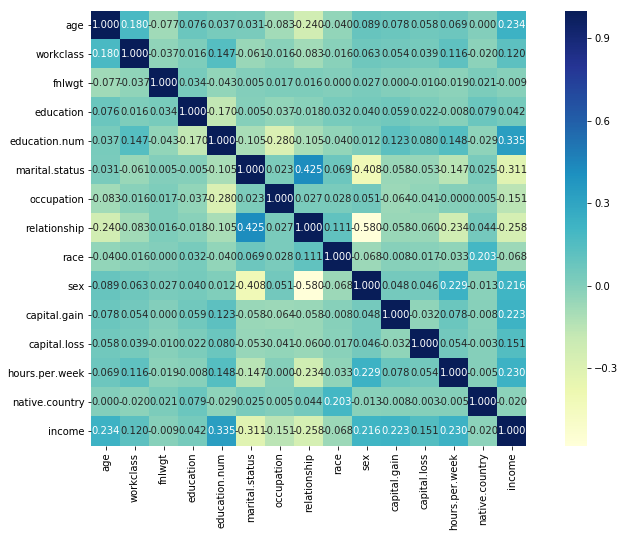

In [13]:
data_columns = list(data.columns)
corr = data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= data_columns, yticklabels= data_columns,
           cmap= 'YlGnBu')
plt.savefig('corr_matrix_all_features.png')
plt.show()

In [14]:
columns = data.columns    
print(columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [15]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0.0,77053,0,9,4,0.0,1,0,0,0,4356,40,0.0,0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0,0
2,66,0.0,186061,1,10,4,0.0,3,1,0,0,4356,40,0.0,0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0,0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0,0


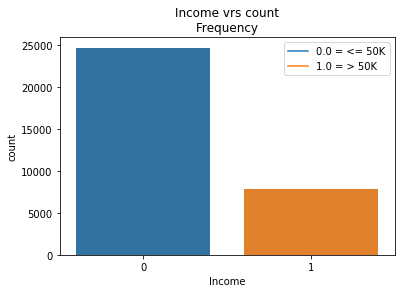

In [16]:
sns.countplot(data["income"])
plt.plot(0, label ="0.0 = <= 50K")
plt.plot(1, label ="1.0 = > 50K")
plt.xlabel("Income")
plt.ylabel("count")
plt.title("Income vrs count\nFrequency")
plt.legend()
plt.savefig('frequency_income.png')
plt.show()

In [17]:
data["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [18]:
X = data.loc[:,'age': 'native.country']

In [19]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0.0,77053,0,9,4,0.0,1,0,0,0,4356,40,0.0
1,82,0.0,132870,0,9,4,2.0,1,0,0,0,4356,18,0.0
2,66,0.0,186061,1,10,4,0.0,3,1,0,0,4356,40,0.0
3,54,0.0,140359,8,4,2,6.0,3,0,0,0,3900,40,0.0
4,41,0.0,264663,1,10,3,0.0,2,0,0,0,3900,40,0.0


In [20]:
y = data.loc[:, 'income':]

In [21]:
y.head()

,income
0,0
1,0
2,0
3,0
4,0


In [22]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 0)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
train_X.shape

(26048, 14)

In [24]:
train_y.shape

(26048, 1)

In [25]:
test_X.shape

(6513, 14)

In [26]:
test_y.shape

(6513, 1)

## Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = dt_classifier.fit(train_X, train_y)

In [28]:
column_features = X.columns

In [29]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [34]:
#from graphviz import Source
#from sklearn import tree
#graph = Source( tree.export_graphviz(dt_classifier, out_file=None, feature_names=column_features))
#graph.format = 'png'
#graph.render('decision_tree',view=True)

In [35]:
#predict_dt_y = dt_classifier.predict(test_X)

In [36]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(test_y, predict_dt_y)

NameError: name 'predict_dt_y' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Decision Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_dt_y)))
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,
            s=cm_dt[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_matrix_Decision_tree.png')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Decision Tree: {0:.3%} ".format(precision_score(test_y, predict_dt_y)))
print ("Recall Decision Tree:   {0:.3%} ".format(recall_score(test_y, predict_dt_y)))
print("F1-Score Decision Tree:  {0:.3%} ".format(f1_score(test_y, predict_dt_y)))

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error Decision Tree: {0:.3%} ".format(mean_squared_error(test_y, predict_dt_y)))
rootMeanSquaredError_dt= sqrt(mean_squared_error(test_y, predict_dt_y))
print ("Root mean squared error Decision Tree: {0:.3%} ".format(rootMeanSquaredError_dt/10))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_tree, tpr_tree, thresholds = roc_curve(test_y, predict_dt_y)

In [32]:
def plot_roc_curve(fpr_tree, tpr_tree, label=None):
    plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve and AUC (Decision Tree)")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_tree, tpr_tree)
plt.savefig('ROC_Curve_Decision_Tree.png')
plt.show()

NameError: name 'fpr_tree' is not defined

In [33]:
#features= list(X.columns[0:10] )

In [ ]:
#features

In [ ]:
#from sklearn.tree import export_graphviz
#export_graphviz(dt_classifier, out_file='adult_tree.dot', feature_names = features, class_names=['<=50K', '>50K'], rounded=True,
 #                   filled=True, impurity=False)

![](adult_tree.png)

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier = rf_classifier.fit(train_X, train_y)

In [ ]:
predict_rf_y = rf_classifier.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, predict_rf_y)

NameError: name 'cm_rf' is not defined

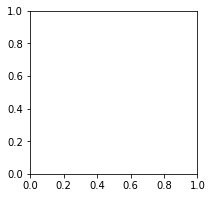

In [31]:
from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_rf, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Random Forest Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_rf_y)))
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,
            s=cm_rf[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.savefig('Confusion_matrix_Random_Forest_tree.png')
plt.show()

In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Random Forest: {0:.3%} ".format(precision_score(test_y, predict_rf_y)))
print ("Recall Random Forest:    {0:.3%} ".format(recall_score(test_y, predict_rf_y)))
print("F1-Score Random Forest:  {0:.3%} ".format(f1_score(test_y, predict_rf_y)))

Precision Random Forest: 74.391% 
Recall Random Forest:    57.272% 
F1-Score Random Forest:  64.719% 


In [153]:
from sklearn.metrics import mean_squared_error
print("Mean squared error Random Forest: {0:.3%} ".format(mean_squared_error(test_y, predict_rf_y)))
rootMeanSquaredError_rf= sqrt(mean_squared_error(test_y, predict_rf_y))
print ("Root mean squared error Random Forest: {0:.3%} ".format(rootMeanSquaredError_rf/10))

Mean squared error Random Forest: 14.832% 
Root mean squared error Random Forest: 3.851% 


In [154]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_rf, tpr_rf, thresholds = roc_curve(test_y, predict_rf_y)

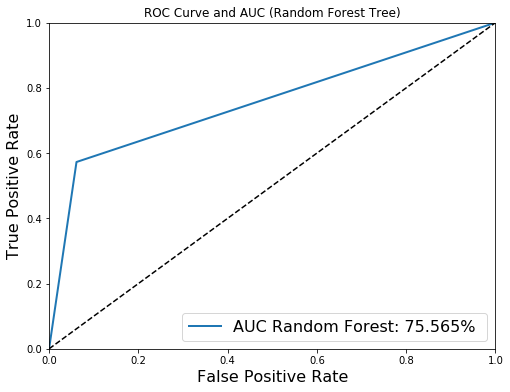

In [155]:
def plot_roc_curve(fpr_rf, tpr_rf, label=None):
    plt.plot(fpr_rf, tpr_rf, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve and AUC (Random Forest Tree)")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf)
plt.savefig('ROC_Curve_Random_Forest_tree.png')
plt.show()

### Bagging Classifier

In [156]:
# Training the bagging model and fitting it to the train X and y
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0), random_state=0)
bag_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [157]:
# Predict against the test set (Bagging classifier)
predict_bg_y = bag_clf.predict(test_X)
predict_bg_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

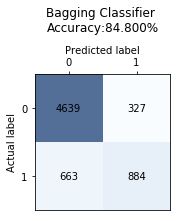

In [158]:
# Making the Confusion Matrix for RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm_bg = confusion_matrix(test_y, predict_bg_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_bg, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Bagging Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_bg_y)))
for i in range(cm_bg.shape[0]):
    for j in range(cm_bg.shape[1]):
        ax.text(x=j, y=i,
            s=cm_bg[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [159]:
#Precision and recall, F1-score for Bagging Classifier
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Bagging Classifier: {0:.3%} ".format(precision_score(test_y, predict_bg_y)))
print ("Recall Bagging Classifier:    {0:.3%} ".format(recall_score(test_y, predict_bg_y)))
print("F1-Score Bagging Classifier:  {0:.3%} ".format(f1_score(test_y, predict_bg_y)))

Precision Bagging Classifier: 72.998% 
Recall Bagging Classifier:    57.143% 
F1-Score Bagging Classifier:  64.104% 


### AdaBoost

In [160]:
# Training the AdaBoost model and fitting it to the train X and y
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0),random_state=0)
ada_clf.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

In [161]:
predict_ada_y = ada_clf.predict(test_X)

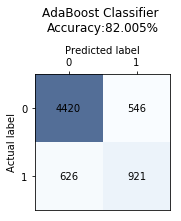

In [162]:
# Making the Confusion Matrix for AdaBoost
from sklearn.metrics import confusion_matrix
cm_ada = confusion_matrix(test_y, predict_ada_y)


from sklearn.metrics import accuracy_score
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(cm_ada, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('AdaBoost Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_ada_y)))
for i in range(cm_ada.shape[0]):
    for j in range(cm_ada.shape[1]):
        ax.text(x=j, y=i,
            s=cm_ada[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

### Feature importance

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


 1) marital.status                 0.233826
 2) capital.gain                   0.181350
 3) relationship                   0.148089
 4) education.num                  0.128024
 5) age                            0.094936
 6) hours.per.week                 0.052456
 7) occupation                     0.044241
 8) capital.loss                   0.041337
 9) education                      0.032563
10) sex                            0.019454
11) fnlwgt                         0.009998
12) workclass                      0.007477
13) native.country                 0.003429
14) race                           0.002820


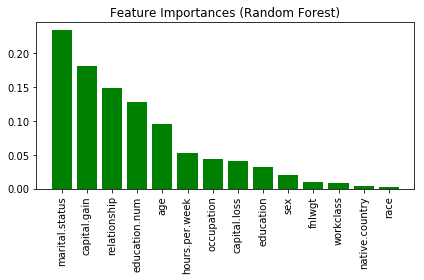

In [163]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = X.columns
forest = RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=500, max_depth=8, n_jobs=-1)
forest.fit(train_X, train_y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30 , feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(train_X.shape[1]), importances[indices], color='green', align='center')
plt.xticks(range(train_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

## Naive Bayes Model

In [164]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

##### Naive Bayes Classification

In [165]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(train_X, train_y)
print(BernNB)

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)


C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
predict_bernNB = BernNB.predict(test_X)
print (accuracy_score(test_y, predict_bernNB))

0.788730231844


In [167]:
predict_bernNB = BernNB.predict(test_X)

In [168]:
multiNB = MultinomialNB()
multiNB.fit(train_X, train_y)
print(multiNB)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [169]:
predict_multi = multiNB.predict(test_X)

In [170]:
print(accuracy_score(test_y, predict_multi))

0.788116075541


In [171]:
GausNB = GaussianNB()
GausNB.fit(train_X, train_y)
print(GausNB)

GaussianNB(priors=None)


C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
predict_gaus = GausNB.predict(test_X)
print(accuracy_score(test_y, predict_gaus))

0.798403193613


## K Nearest Neighbour

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics

In [174]:
X = preprocessing.scale(X)

In [175]:
clf_neigh = neighbors.KNeighborsClassifier()
clf_neigh = clf_neigh.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [176]:
predict_neigh = clf_neigh.predict(test_X)
print (accuracy_score(test_y, predict_neigh))

0.776447105788
